# Đồ án cuối kì
Thông tin nhóm:
1. Lê Hồng Huy - 18120182
2. Nguyễn Thị Minh Vượng - 18120265
<br/><br/>

Github làm việc [tại đây](https://github.com/MinhVuong2000/P4DS-FinalProject)

---

## Môi trường code

In [1]:
import sys
sys.executable

'/Users/vuongnguyenthiminh/opt/anaconda3/envs/min_ds-env/bin/python'

---

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# YOUR CODE HERE (OPTION) 

---

## Thu thập dữ liệu

Dữ liệu được lấy từ Kaggle, là tập [Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
- Là tập dữ liệu về tim mạch, cụ thể là về bệnh suy tim. Suy tim là một sự kiện phổ biến trong nhóm bệnh tim mạch và tập dữ liệu này có thể được sử dụng để dự đoán bệnh tim có thể xảy ra.
- Tập dữ liệu được tạo bằng cách kết hợp của 5 tập dữ liệu khác nhau có sẵn độc lập nhau, để cho ra dữ liệu gồm 11 thuộc tính chung và 918 dòng, giúp nó trở thành lớn nhất trong số các tập dữ liệu về bệnh tim phục vụ cho việc nghiên cứu. 

### Tải dữ liệu 

In [3]:
!wget -O data.csv https://gist.githubusercontent.com/MinhVuong2000/8286380838ef575032894dceab5072ed/raw/cc96ec954cc1d94c0548a32f64ff29ba3f8390bf/heart.csv

--2022-01-12 19:56:01--  https://gist.githubusercontent.com/MinhVuong2000/8286380838ef575032894dceab5072ed/raw/cc96ec954cc1d94c0548a32f64ff29ba3f8390bf/heart.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  35.08K  --.-KB/s    in 0.003s  

2022-01-12 19:56:03 (13.4 MB/s) - ‘data.csv’ saved [35921/35921]



### Đọc dữ liệu

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


---

## Khám phá dữ liệu

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
df.shape

(918, 12)

Như vậy tập dữ liệu có 918 dòng và 12 cột.

Số dòng thì đúng rồi, Nhưng trong tài liệu ghi 11 cột? -> Do cột còn lại là nhãn, tức cột HeartDisease

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo như tài liệu, mỗi dòng sẽ là một quan sát chứa số liệu các thuộc tính. Nhìn sơ bộ thì không có gì đặc biệt

### Dữ liệu có các dòng bị lặp không?

In [6]:
have_duplicated_rows = df.duplicated().sum()
if have_duplicated_rows:
    print('Dữ liệu có quan sát bị trùng!')
else:
    print('Dữ liệu không có dòng nào bị trùng!')

Dữ liệu không có dòng nào bị trùng!


Như vậy output này là hợp lí. Vì theo trong tài liệu trên Kaggle cũng đã ghi rõ, từ tổng số 1190 quan sát với 272 quan sát trùng, người ta đưa đến tập dữ liệu cuối cùng gồm 918 quan sát.

### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả về tập dữ liệu trên Kaggle:
- **Age**: tuổi của bệnh nhân [years]
- **Sex**: giới tính bệnh nhân [M: Male, F: Female]
- **ChestPainType**: kiểu đau ngực [TA: đau nhói ngực điển hình, ATA: đau thắt ngực không điển hình, NAP: đau thắt lưng không điển hình, ASY: Không có triệu chứng]
- **RestingBP**: huyết áp lúc nghỉ [mm Hg]
- **Cholesterol**: chỉ số cholesterol [mm/dl]
- **FastingBS**: chỉ số đường huyết lúc đói có lớn hơn 120mg/dl hay không [1: có, 0: không]
- **RestingECG**: kết quả điện tâm đồ lúc nghỉ [Normal: bình thường, ST: có bất thường sóng ST-T (đảo ngược sóng T và/hoặc ST chênh lên hoặc trầm xuống> 0,05 mV), LVH: cho thấy phì đại thất trái có thể xảy ra hoặc xác định theo tiêu chuẩn của Estes]
- **MaxHR**: nhịp tim tối đa đạt được [con số giữa 60 và 202]
- **ExerciseAngina**: đau thắt ngực do tập thể dục [Y: Có, N: Không]
- **Oldpeak**: oldpeak = ST [Giá trị số được đo bằng độ trầm cảm]
- **ST_Slope**: độ dốc của bài tập đỉnh cao Đoạn ST [Up: dốc lên, Flat: bằng phẳng, Down: dốc xuống]
- **HeartDisease**: nhãn [1: có bệnh, 0: bình thường]

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
print('Kiểu dữ liệu của các cột trong tập dữ liệu:')
df.dtypes

Kiểu dữ liệu của các cột trong tập dữ liệu:


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Dựa trên mô tả về các cột, em thấy kiểu dữ liệu hiện tại là hợp lý

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Có 7 cột có kiểu dữ liệu dạng số: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, và HeartDisease. 

Tuy nhiên, 
- cột HeartDisease thực chất thuộc loại categorical (trả lời câu hỏi có hay không bị bệnh), 
- Cột FastingBS cũng là trả lời có hay không cao hơn ngưỡng đưa ra (ở đây là 120mg/dl)

Nên ta chỉ xét 5 cột còn lại: Age, Cholesterol, FastingBS, MaxHR, Oldpeak là thực sự thuộc kiểu dữ liệu dạng số 

#### Lấy 6 cột vừa nói và xem xét tỉ lệ giá trị thiếu, min max của từng cột

In [8]:
def missing_ratio(col):
    return col.isna().mean() * 100

nume_col_df = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
nume_col_profiles_df = nume_col_df.agg([missing_ratio , min, max])
nume_col_profiles_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
missing_ratio,0.0,0.0,0.0,0.0,0.0
min,28.0,0.0,0.0,60.0,-2.6
max,77.0,200.0,603.0,202.0,6.2


Như vậy, các cột thuộc kiểu numeric không có giá trị thiếu. Min max ta thấy hiện tại cũng chưa có gì bất thường

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 7 cột dữ liệu dạng categorical: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope and HeartDisease. 

In [ ]:
def unique_non_nan(s):
    return s.dropna().unique()

cate_col_df = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']]
cate_col_profiles_df = cate_col_df.agg([missing_ratio, pd.Series.nunique, unique_non_nan])
cate_col_profiles_df.index = ['missing_ratio','num_diff_vals','diff_vals']
cate_col_profiles_df

---

## Đặt câu hỏi
Danh sách câu hỏi

với mỗi câu hỏi, nhóm bạn cần trình bày:
• Câu hỏi là gì?
• Nếu trả lời được câu hỏi thì sẽ có lợi ích gì? (câu hỏi không quá dễ để trả lời - 1 dòng code)

### Câu hỏi 1

- Trong tập dữ liệu, nam hay nữ chiếm nhiều quan sát hơn? Tỉ lệ mắc bệnh trên tổng số quan sát của mỗi giới
- Câu hỏi này sẽ giúp trả lời cho việc nam hay nữ dễ bị mắc bệnh hơn

Để trả lời câu hỏi này, ta tiến hành:
- Bước 1: Xem số lượng dòng của mỗi giới tính
- Bước 2: Tính tỉ lệ mắc bệnh trong tổng số quan sát ở mỗi giới

Code bước 1

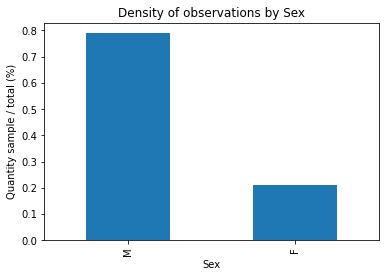

In [17]:
density_by_sex = df['Sex'].value_counts() / len(df)
density_by_sex.plot.bar(xlabel='Sex', ylabel='Quantity sample / total (%)', title='Density of observations by Sex');


Như vậy, dữ liệu này khá là chênh lệch về số lượng mẫu quan sát. 
Do đó, để nhận xét tỉ lệ mắc bệnh, ta sẽ lấy số trường hợp mắc bệnh chia cho số lượng mẫu quan sát ở mỗi giới

Code bước 2

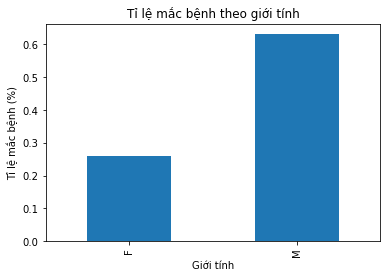

In [29]:
label_by_sex = df.groupby(['Sex', 'HeartDisease']).size().unstack()
ratio_disease_by_sex = label_by_sex[1] / label_by_sex.sum(axis=1)
ratio_disease_by_sex.plot.bar(title='Tỉ lệ mắc bệnh theo giới tính', xlabel='Giới tính', ylabel='Tỉ lệ mắc bệnh (%)');

Như vậy, dựa trên dữ liệu, ta có thể nhận xét sơ bộ tỉ lệ mắc bệnh của nam cao hơn của nữ

Cụ thể:
- 20 người Nữ thì sẽ 5 người mắc bệnh
- 10 người Nam thì có 5 người mắc bệnh

Tuy nhiên, nhận xét này có vẻ chưa thuyết phục lắm do cần phải xem xét độ tuổi khảo sát nữa

### Câu hỏi 2

#### Tiền xử lý & Phân tích để trả lời câu hỏi
Với mỗi câu hỏi:
• Có cần tiền xử lý dữ liệu không và nếu có thì nhóm bạn
tiền xử lý như thế nào?
• Text: vạch ra các bước thực hiện một cách rõ ràng và dễ
hiểu sao cho nếu người đọc không đọc code thì vẫn có
thể hiểu được cách bạn tiền xử lý
• Code: cài đặt các bước đã vạch ra ở trên. Nhóm bạn
cũng cố gắng viết code cho rõ ràng và dễ đọc (chọn tên
biến gợi nhớ, comment ở những chỗ mà nên comment,
không để một dòng code quá dài)
• Nhóm bạn phân tích dữ liệu như thế nào để ra được
câu trả lời cho câu hỏi?
• Text: tương tự như trên
• Code: tương tự như trên
• Chart: phát hiện insight từ chart

### Câu hỏi 3

#### Tiền xử lý & Phân tích để trả lời câu hỏi
Với mỗi câu hỏi:
• Có cần tiền xử lý dữ liệu không và nếu có thì nhóm bạn
tiền xử lý như thế nào?
• Text: vạch ra các bước thực hiện một cách rõ ràng và dễ
hiểu sao cho nếu người đọc không đọc code thì vẫn có
thể hiểu được cách bạn tiền xử lý
• Code: cài đặt các bước đã vạch ra ở trên. Nhóm bạn
cũng cố gắng viết code cho rõ ràng và dễ đọc (chọn tên
biến gợi nhớ, comment ở những chỗ mà nên comment,
không để một dòng code quá dài)
• Nhóm bạn phân tích dữ liệu như thế nào để ra được
câu trả lời cho câu hỏi?
• Text: tương tự như trên
• Code: tương tự như trên
• Chart: phát hiện insight từ chart

---

## Nhìn lại quá trình làm đồ án
Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây
giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quãng
đường vừa qua
• Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi
chuyện đều thuận lợi)
• Mỗi thành viên: Có học được gì hữu ích? (Hay không
học được gì)
• Nhóm: Nếu có thêm thời gian thì sẽ làm gì?
Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay
• Chart: phát hiện insight từ chart

---

## Tài liệu tham khảo
Để hoàn thành đồ án thì nhóm bạn đã tham khảo những tài liệu nào?